<div style="padding:24px 20px;border:1px solid #e5e7eb;border-radius:16px;background:#fbfbfd;">
  <h1 style="margin:0 0 6px 0;font-size:32px;letter-spacing:-0.02em;">
    AirAlloc — Demonstração Interativa
  </h1>
  <p style="margin:0 0 14px 0;font-size:14px;opacity:.85;">
    Algoritmo Genético · Rede de rotas · Métricas &amp; visualização
  </p>

  <div style="display:flex;gap:8px;flex-wrap:wrap;margin:8px 0 18px 0;">
    <span style="padding:4px 10px;border:1px solid #e5e7eb;border-radius:999px;">GA</span>
    <span style="padding:4px 10px;border:1px solid #e5e7eb;border-radius:999px;">Decodificador</span>
    <span style="padding:4px 10px;border:1px solid #e5e7eb;border-radius:999px;">Métricas</span>
    <span style="padding:4px 10px;border:1px solid #e5e7eb;border-radius:999px;">Visualização</span>
  </div>

  <ol style="margin:0 0 0 18px;line-height:1.6;">
    <li>Carregar a instância de exemplo;</li>
    <li>Visualizar a rede de rotas;</li>
    <li>Executar o Algoritmo Genético (AG);</li>
    <li>Decodificar e medir a solução;</li>
    <li>Destacar as arestas efetivamente voadas.</li>
  </ol>
</div>


## Preliminar

In [ ]:
# Preparação
import sys
from pathlib import Path

project_root = Path("..").resolve()  # ajuste se necessário
sys.path.insert(0, str(project_root))

In [ ]:
from src.airalloc.data import load_instance
from src.airalloc.decoder import decode_chromosome
from src.airalloc.fitness import compute_metrics
from src.airalloc.genetic.algorithm import run_ga
from src.airalloc.visualize import plot_network, schedules_to_dataframe

# Caminhos dos CSVs (ajuste caso rode fora da raiz do projeto)
airports_csv = str(project_root / "data" / "airports.csv")
routes_csv = str(project_root / "data" / "routes.csv")
aircraft_csv = str(project_root / "data" / "aircraft.csv")
demand_csv = str(project_root / "data" / "demand.csv")

inst = load_instance(airports_csv, routes_csv, aircraft_csv, demand_csv)

In [ ]:
print("Airports:", list(inst.airports.keys()))
print("Routes:", len(inst.routes))
print("Aircraft:", list(inst.aircraft.keys()))
print("Demands:", len(inst.demands))

Airports: ['GRU', 'BSB', 'GIG', 'SSA']
Routes: 8
Aircraft: ['A1', 'A2', 'A3', 'A4']
Demands: 9


## Visualização da rede de rotas

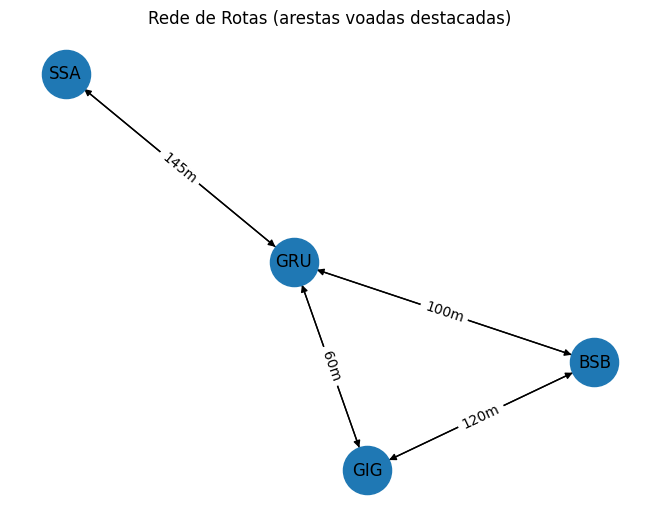

In [ ]:
plot_network(inst, schedules={})

## Execução rápida do AG

In [ ]:
best, score = run_ga(inst, pop_size=60, n_genes=20, generations=10000, seed=1)
schedules = decode_chromosome(best, inst)
metrics = compute_metrics(schedules, inst)
print("Melhor fitness:", score)
for k, v in metrics.items():
    print(f"{k}: {v}")

Melhor fitness: 2807.75
pct_demanda_atendida: 79.41176470588236
atraso_medio_min: 1.25
voos_fora_da_estrutura: 3
reposicionamentos: 1
total_pernas: 20
demanda_nao_atendida: 280


In [ ]:
# Também pode trabalhar com o DataFrame diretamente
df_sched = schedules_to_dataframe(schedules)
df_sched

,Aeronave,Origem,Destino,Dep. desejada,Dep. real,Chegada,Atraso (min),Factível
0,A1,GRU,BSB,07:58,07:58,09:33,0,✓
1,A1,BSB,GRU,10:19,10:19,11:59,0,✓
2,A1,GRU,SSA,12:35,12:39,14:59,4,✓
3,A1,SSA,GRU,15:26,15:39,18:04,13,✓
4,A1,GRU,GIG,19:00,19:00,19:55,0,✓
5,A1,GRU,SSA,20:36,20:36,22:56,0,✗
6,A1,SSA,GRU,23:07,23:36,02:01,29,✗
7,A2,BSB,SSA,01:24,01:24,01:24,0,✗
8,A2,GRU,BSB,08:49,08:49,10:24,0,✓
9,A2,BSB,GIG,13:09,13:09,15:09,0,✓


## Visualização com arestas voadas destacadas

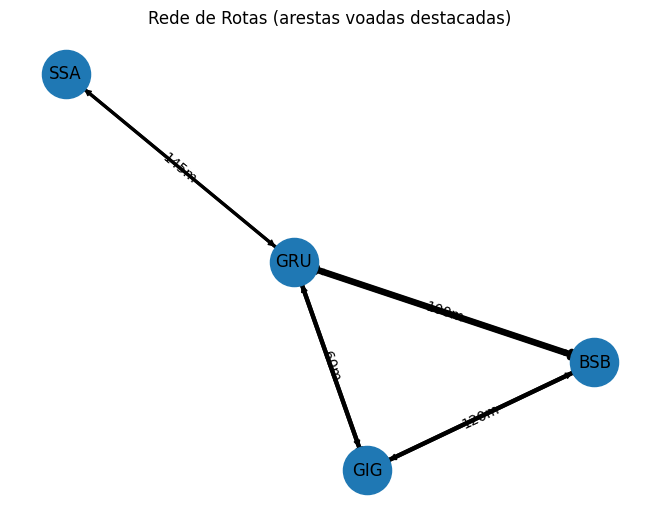

In [ ]:
plot_network(inst, schedules)